## TASK 3

### Pizza Place Sales Analysis

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

#### In this section, we import the necessary Python libraries required for data manipulation and visualization.

- Pandas is used for data cleaning and transformation.

- NumPy supports numerical operations.

- Matplotlib and Seaborn are used for visualizing trends and patterns in the data.

- Import warnings and filterwarnings helps us remove the warning signs thereby making the whole data presentable

#### These tools allow us to efficiently explore and analyze structured sales data.

#### Importing The Datasets

In [2]:
orders = pd.read_csv(r"C:\Users\USER-PC\Desktop\orders.csv")
order_details = pd.read_csv(r"C:\Users\USER-PC\Desktop\order_details.csv")
pizzas = pd.read_csv(r"C:\Users\USER-PC\Desktop\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\USER-PC\Desktop\pizza_types.csv", encoding = "latin1")

In [3]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


#### The dataset consists of four related tables containing transactional and product-level information.
Each table captures a different dimension of the business:

- Orders contain transaction timestamps.

- Order Details contain quantity per order.

- Pizzas contain pricing and size.

- Pizza Types contain category and ingredient information.

The (.head) helps us Inspects the first few rows which helps us understand structure and relationships between columns.

#### Merging The Datasets

In [7]:
df = pd.merge(order_details, orders, on="order_id")
df = pd.merge(df, pizzas, on="pizza_id")
df = pd.merge(df, pizza_types, on="pizza_type_id")

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


#### Since the data is distributed across four related tables, merging them into a single dataframe enables comprehensive analysis.

The merge was performed using:

- order_id to link transactions,

- pizza_id to attach pricing details,

- pizza_type_id to include product categories and names.

This unified dataset now contains all relevant sales, product, and time information needed for business analysis.

#### Creating Revenue Column

In [8]:
df["revenue"] = df["quantity"] * df["price"]

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


- Revenue is not explicitly provided in the dataset, so we compute it manually.

- Revenue = Quantity × Price

This new column allows us to measure financial performance across products, time periods, and categories.

#### Total Revenue

In [9]:
total_revenue = df["revenue"].sum()

total_revenue

np.float64(817860.0499999999)

- The total revenue represents the total income generated by the restaurant during the year.
- It provides a high-level measure of overall business performance.

#### Total Quantity Sold

In [10]:
total_quantity = df["quantity"].sum()

total_quantity

np.int64(49574)

- The total quantity sold indicates overall product demand.

- This metric helps assess operational scale and inventory movement across the year.


#### Total Orders

In [11]:
total_orders = df["order_id"].nunique()

total_orders

21350

- The total number of unique orders reflects customer transaction volume.

- This helps evaluate customer traffic and business activity throughout the year.

#### How Many Pizza Types They Sell

In [12]:
total_pizza_types = df["name"].nunique()

total_pizza_types

32

- To determine how many different pizza types the restaurant offers, we calculate the number of unique pizza names in the dataset.

- Using the nunique() function ensures we count each pizza only once, regardless of how many times it was sold.

- This metric helps evaluate menu diversity and product variety offered by the business.

#### Average Price Of The Pizzas

In [13]:
average_price = df["price"].mean()

average_price

np.float64(16.494132044426163)

- The average price reflects the restaurant’s pricing strategy.

- Calculating it directly from the pizzas table avoids duplication caused by repeated sales records.

- This metric helps determine whether the restaurant operates in a premium or budget segment.

#### Peak Sales Hours

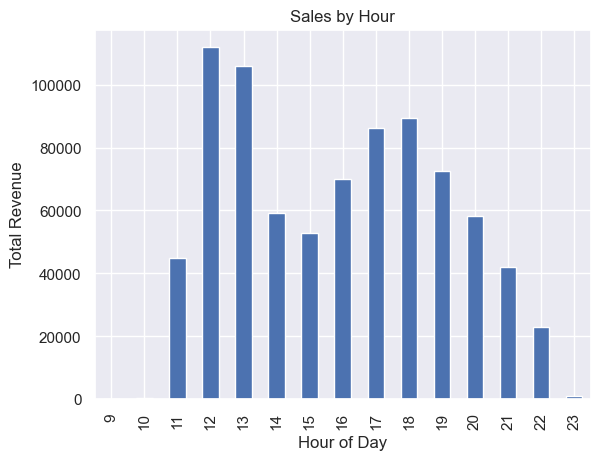

In [14]:
df["time"] = pd.to_datetime(df["time"])
df["hour"] = df["time"].dt.hour

hourly_sales = df.groupby("hour")["revenue"].sum()

hourly_sales.plot(kind="bar")
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")
plt.show()

- Analyzing hourly sales allows us to identify peak business hours.

This insight is critical for:

- Staff scheduling

- Inventory preparation

- Operational efficiency

Identifying high-demand hours helps management allocate resources effectively.

#### Sales by Day of the Week

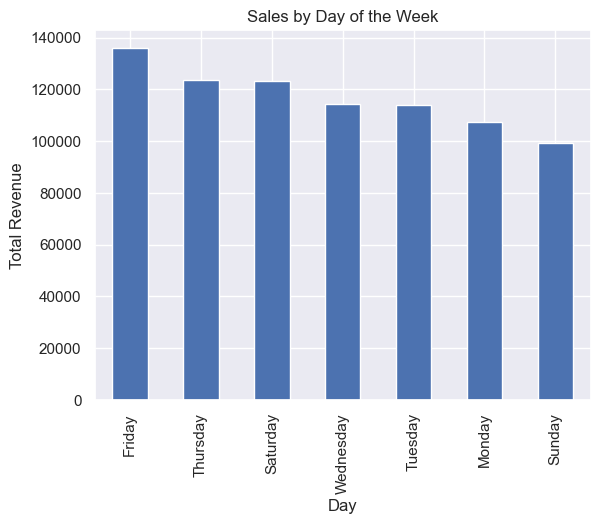

In [15]:
df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day_name()

day_sales = df.groupby("day")["revenue"].sum().sort_values(ascending=False)

day_sales.plot(kind="bar")
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Revenue")
plt.show()

- This analysis reveals customer purchasing patterns across the week.

- Higher-performing days may indicate weekend demand or promotional effects.

- Based on the chart, its shows that Fridays has the highest sales by day of the week

#### Top 5 Bestselling Pizzas

In [16]:
top5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)

top5

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

- Identifying the top-selling pizzas highlights the products driving the majority of revenue.
  
- These items should be strategically positioned in marketing and menu design.

#### Monthly Sales Trend

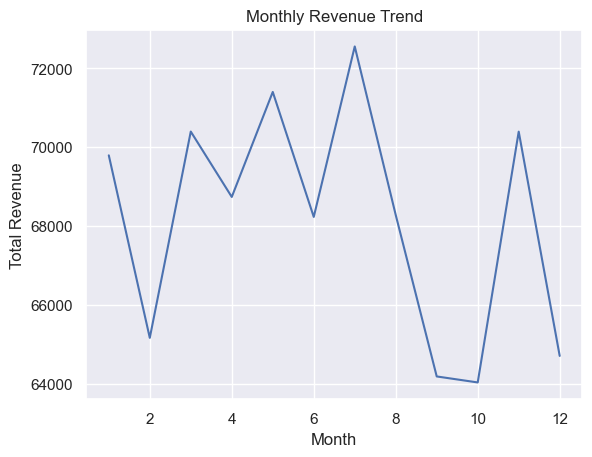

In [17]:
df["month"] = df["date"].dt.month
monthly_sales = df.groupby("month")["revenue"].sum()

monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

- This Monthly sales analysis helps identify seasonal patterns and revenue fluctuations.
- This trend also shows that sales are mostly high at the 7th month

Observing trends over time enables the business to:

- Prepare for peak seasons

- Address slow months proactively

- Optimize promotional timing

#### Underperforming Pizza Types

In [18]:
low_sales = df.groupby("name")["quantity"].sum().sort_values().head(5)

low_sales

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

- Low-performing pizzas contribute minimally to total sales.

Management may consider:

- Reviewing pricing

- Offering promotions

- Reformulating recipes

- Replacing items entirely

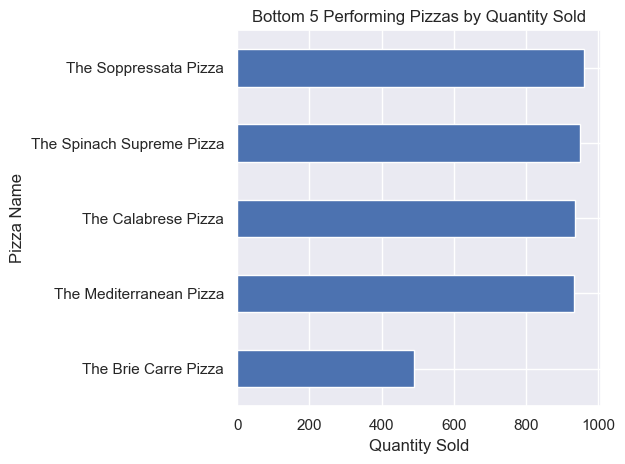

In [21]:
plt.figure()

low_sales.plot(kind="barh")

plt.title("Bottom 5 Performing Pizzas by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza Name")

plt.tight_layout()
plt.show()

- The Brie Carre Pizza recorded the lowest sales volume among the bottom five pizzas, indicating significantly lower customer preference compared to other menu items.

- The remaining pizzas show relatively close performance levels, suggesting moderate but not strong demand.

- The Management may consider promotional strategies or menu adjustments for these items to improve sales performance.